In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("GenomicAnalysis").getOrCreate()

StatementMeta(, 5cbeacd0-2fd7-49f7-9362-62346897f60f, 3, Finished, Available, Finished)

In [2]:
# Load genomic data from Lakehouse
df = spark.read.csv(
    "Files/PDC_biospecimen_manifest_03272025_214257.csv",
    header=True,
    inferSchema=True
)

# Display schema and sample data
df.printSchema()
display(df.limit(5))

StatementMeta(, 5cbeacd0-2fd7-49f7-9362-62346897f60f, 4, Finished, Available, Finished)

root
 |-- Aliquot ID: string (nullable = true)
 |-- Aliquot Submitter ID: string (nullable = true)
 |-- Sample ID: string (nullable = true)
 |-- Sample Submitter ID: string (nullable = true)
 |-- Case ID: string (nullable = true)
 |-- Case Submitter ID: string (nullable = true)
 |-- Project Name: string (nullable = true)
 |-- Sample Type: string (nullable = true)
 |-- Primary Site: string (nullable = true)
 |-- Disease Type: string (nullable = true)
 |-- Aliquot Is Ref: string (nullable = true)
 |-- Aliquot Status: string (nullable = true)
 |-- Aliquot Quantity: string (nullable = true)
 |-- Aliquot Volume: string (nullable = true)
 |-- Amount: string (nullable = true)
 |-- Analyte Type: string (nullable = true)
 |-- Concentration: string (nullable = true)
 |-- Case Status: string (nullable = true)
 |-- Sample Status: string (nullable = true)
 |-- Sample Is Ref: string (nullable = true)
 |-- Biospecimen Anatomic Site: string (nullable = true)
 |-- Biospecimen Laterality: string (nullab

SynapseWidget(Synapse.DataFrame, 6a2743cb-8144-4799-a949-027814db2968)

StatementMeta(, 5cbeacd0-2fd7-49f7-9362-62346897f60f, 9, Finished, Available, Finished)

Available columns:
['Aliquot ID', 'Aliquot Submitter ID', 'Sample ID', 'Sample Submitter ID', 'Case ID', 'Case Submitter ID', 'Project Name', 'Sample Type', 'Primary Site', 'Disease Type', 'Aliquot Is Ref', 'Aliquot Status', 'Aliquot Quantity', 'Aliquot Volume', 'Amount', 'Analyte Type', 'Concentration', 'Case Status', 'Sample Status', 'Sample Is Ref', 'Biospecimen Anatomic Site', 'Biospecimen Laterality', 'Composition', 'Current Weight', 'Days To Collection', 'Days To Sample Procurement', 'Diagnosis Pathologically Confirmed', 'Freezing Method', 'Initial Weight', 'Intermediate Dimension', 'Longest Dimension', 'Method Of Sample Procurement', 'Pathology Report UUID', 'Preservation Method', 'Sample Type id', 'Sample Ordinal', 'Shortest Dimension', 'Time Between Clamping And Freezing', 'Time Between Excision and Freezing', 'Tissue Collection Type', 'Tissue Type', 'Tumor Code', 'Tumor Code ID', 'Tumor Descriptor', 'Program Name']
root
 |-- Aliquot ID: string (nullable = true)
 |-- Aliquot S

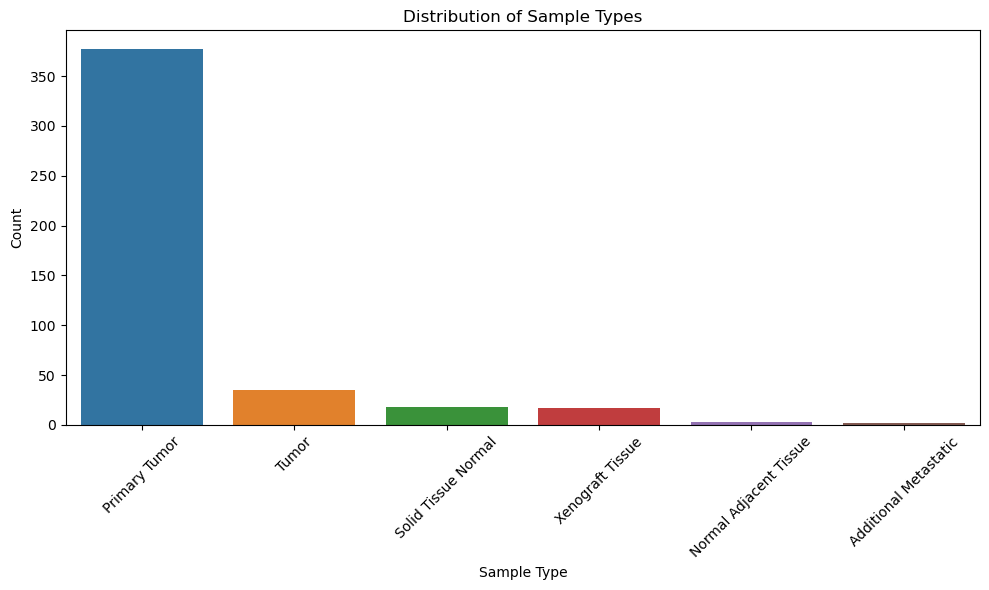


2. Disease Type Distribution:


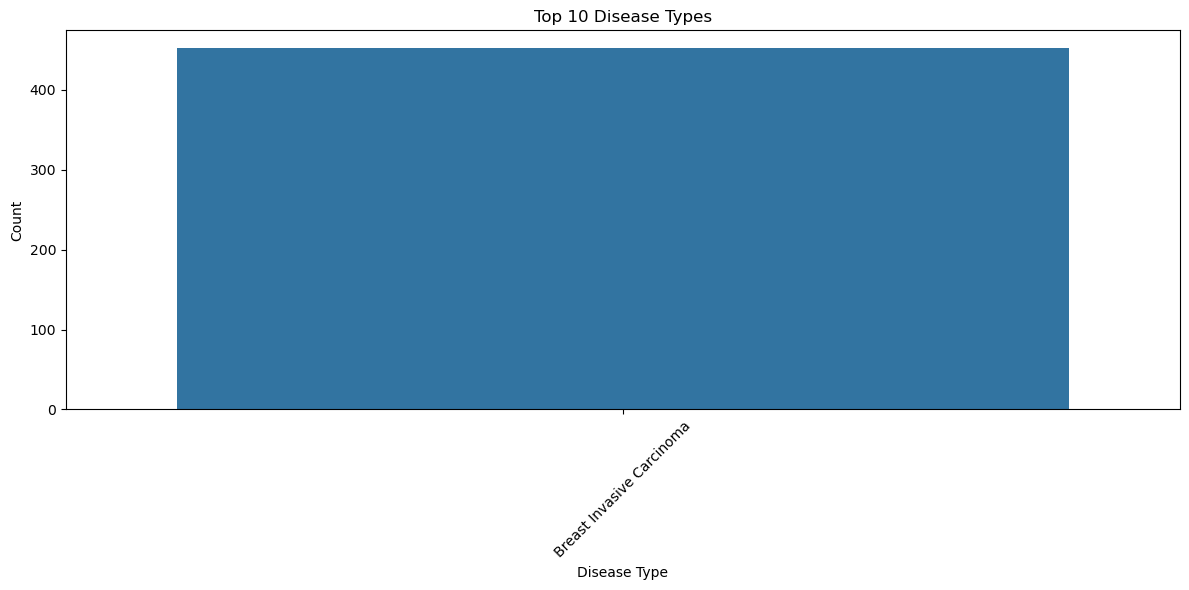


3. Sample Status Distribution:


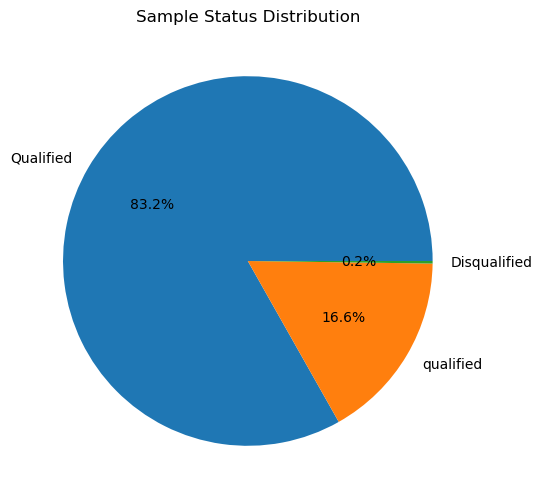


4. Primary Site Distribution:


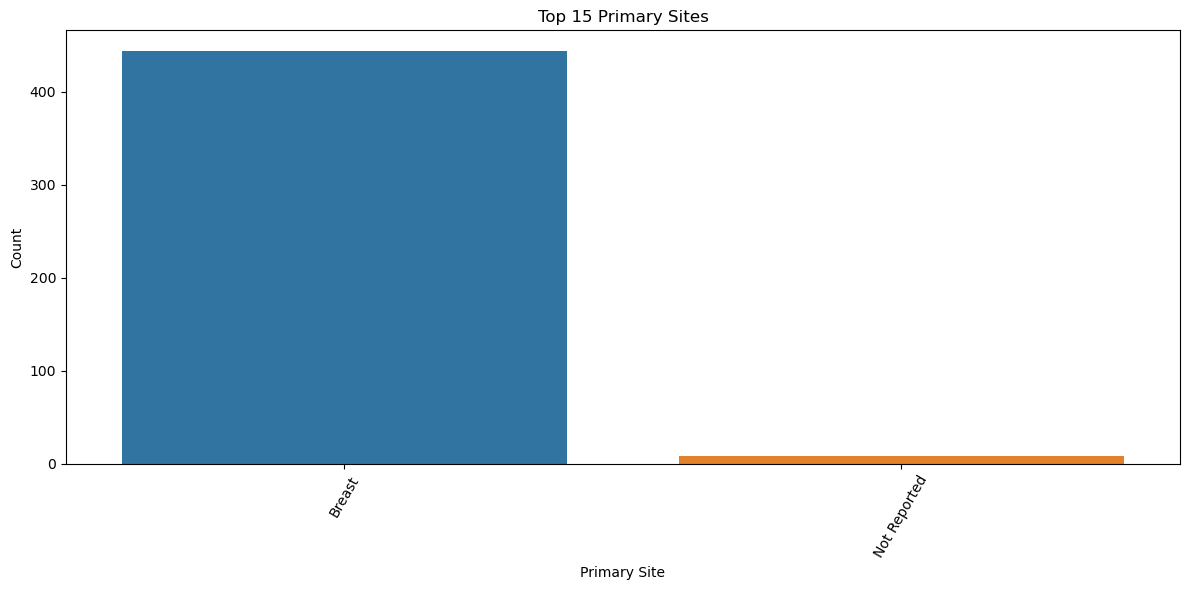


=== Analysis Complete ===


In [7]:
from pyspark.sql.functions import col, count, when
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Initialize Spark Session (if not already done)
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("BiospecimenAnalysis").getOrCreate()

## 2. Load Data (assuming already loaded as 'df')
# df = spark.read.csv("your_file_path.csv", header=True)

## 3. Verify Data
print("Available columns:")
print(df.columns)
df.printSchema()

## 4. Sample Type Analysis
def analyze_sample_types(df):
    try:
        # Count by sample type
        sample_counts = df.groupBy("Sample Type").agg(
            count("*").alias("Count")
        ).orderBy("Count", ascending=False)
        
        # Convert to pandas for visualization
        pdf = sample_counts.toPandas()
        
        # Plot
        plt.figure(figsize=(10, 6))
        sns.barplot(x="Sample Type", y="Count", data=pdf)
        plt.title("Distribution of Sample Types")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        return sample_counts
    except Exception as e:
        print(f"Error in sample type analysis: {str(e)}")
        return None

## 5. Disease Type Analysis
def analyze_disease_types(df):
    try:
        # Count by disease type
        disease_counts = df.groupBy("Disease Type").agg(
            count("*").alias("Count")
        ).orderBy("Count", ascending=False)
        
        # Plot top 10
        top_diseases = disease_counts.limit(10).toPandas()
        
        plt.figure(figsize=(12, 6))
        sns.barplot(x="Disease Type", y="Count", data=top_diseases)
        plt.title("Top 10 Disease Types")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        return disease_counts
    except Exception as e:
        print(f"Error in disease type analysis: {str(e)}")
        return None

## 6. Sample Status Analysis
def analyze_sample_status(df):
    try:
        # Status distribution
        status_counts = df.groupBy("Sample Status").agg(
            count("*").alias("Count")
        ).orderBy("Count", ascending=False)
        
        # Plot
        pdf = status_counts.toPandas()
        
        plt.figure(figsize=(8, 6))
        plt.pie(pdf["Count"], labels=pdf["Sample Status"], autopct='%1.1f%%')
        plt.title("Sample Status Distribution")
        plt.show()
        
        return status_counts
    except Exception as e:
        print(f"Error in sample status analysis: {str(e)}")
        return None

## 7. Primary Site Analysis
def analyze_primary_sites(df):
    try:
        # Count by primary site
        site_counts = df.groupBy("Primary Site").agg(
            count("*").alias("Count")
        ).orderBy("Count", ascending=False)
        
        # Plot top 15
        top_sites = site_counts.limit(15).toPandas()
        
        plt.figure(figsize=(12, 6))
        sns.barplot(x="Primary Site", y="Count", data=top_sites)
        plt.title("Top 15 Primary Sites")
        plt.xticks(rotation=60)
        plt.tight_layout()
        plt.show()
        
        return site_counts
    except Exception as e:
        print(f"Error in primary site analysis: {str(e)}")
        return None

## 8. Main Analysis Pipeline
def run_analysis_pipeline(df):
    print("\n=== Starting Biospecimen Analysis ===")
    
    print("\n1. Sample Type Distribution:")
    sample_results = analyze_sample_types(df)
    
    print("\n2. Disease Type Distribution:")
    disease_results = analyze_disease_types(df)
    
    print("\n3. Sample Status Distribution:")
    status_results = analyze_sample_status(df)
    
    print("\n4. Primary Site Distribution:")
    site_results = analyze_primary_sites(df)
    
    print("\n=== Analysis Complete ===")
    
    return {
        "sample_types": sample_results,
        "disease_types": disease_results,
        "sample_status": status_results,
        "primary_sites": site_results
    }

## 9. Execute Analysis
analysis_results = run_analysis_pipeline(df)

## 10. Save Results (optional)
# analysis_results["sample_types"].write.mode("overwrite").parquet("sample_type_counts.parquet")

StatementMeta(, 5cbeacd0-2fd7-49f7-9362-62346897f60f, 26, Finished, Available, Finished)

Starting analysis pipeline...

1. Loading data...
Successfully loaded file from: /lakehouse/default/Files/PDC_biospecimen_manifest_03272025_214257.csv

Data shape: (452, 45)

Missing values per column:
Aliquot ID                              0
Aliquot Submitter ID                    0
Sample ID                               0
Sample Submitter ID                     0
Case ID                                 0
Case Submitter ID                       0
Project Name                            0
Sample Type                             0
Primary Site                            0
Disease Type                            0
Aliquot Is Ref                          0
Aliquot Status                          0
Aliquot Quantity                      452
Aliquot Volume                        452
Amount                                452
Analyte Type                           76
Concentration                         452
Case Status                             0
Sample Status                           0


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


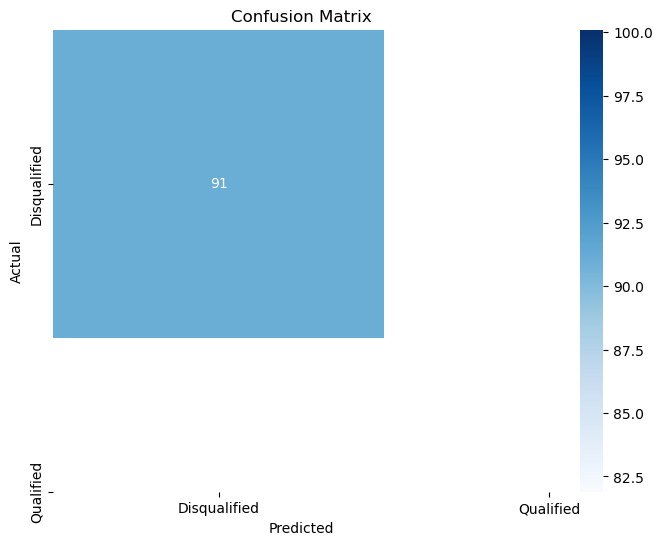


Pipeline completed successfully!


In [24]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## --------------------------------------------
## 1. DATA LOADING
## --------------------------------------------

def load_data_fabric():
    """Load data using the path that worked for you"""
    try:
        file_path = "/lakehouse/default/Files/PDC_biospecimen_manifest_03272025_214257.csv"
        df = pd.read_csv(file_path)
        print(f"Successfully loaded file from: {file_path}")
        
        # Show basic info about the data
        print(f"\nData shape: {df.shape}")
        print("\nMissing values per column:")
        print(df.isnull().sum())
        
        return df
    except Exception as e:
        print(f"Failed to load data: {str(e)}")
        raise

## --------------------------------------------
## 2. DATA PREPARATION WITH ROBUST NaN HANDLING
## --------------------------------------------

def prepare_data(df):
    """Prepare data with comprehensive NaN handling"""
    try:
        # SELECT FEATURES - using columns that exist in your data
        feature_cols = [
            'Aliquot Quantity', 
            'Aliquot Volume',
            'Concentration',
            'Days To Collection',
            'Days To Sample Procurement',
            'Current Weight',
            'Initial Weight'
        ]
        
        # Filter to only columns that actually exist
        feature_cols = [col for col in feature_cols if col in df.columns]
        
        if not feature_cols:
            raise ValueError("No feature columns found")
        
        # SELECT TARGET - using 'Case Status' which exists in your data
        target_col = 'Case Status'
        if target_col not in df.columns:
            raise ValueError(f"Target column '{target_col}' not found")
        
        print(f"\nUsing features: {feature_cols}")
        print(f"Using target: {target_col}")
        
        # Handle missing values in features
        print("\nMissing values in selected features before imputation:")
        print(df[feature_cols].isnull().sum())
        
        # Create imputer for numeric features
        numeric_imputer = SimpleImputer(strategy='median')
        X = numeric_imputer.fit_transform(df[feature_cols])
        
        # Encode categorical target
        le = LabelEncoder()
        y = le.fit_transform(df[target_col].astype(str))  # Ensure string type
        
        # Scale features
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        
        # Verify no NaN values remain
        if np.isnan(X).any():
            raise ValueError("NaN values still present after imputation")
        
        return X, y, le.classes_
        
    except Exception as e:
        print(f"\nData preparation failed: {str(e)}")
        raise

## --------------------------------------------
## 3. MODEL TRAINING AND EVALUATION
## --------------------------------------------

def train_and_evaluate(X, y, class_names):
    """Train model with comprehensive evaluation"""
    try:
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42)
        
        # Train model
        model = RandomForestClassifier(
            n_estimators=100,
            random_state=42,
            n_jobs=-1,
            class_weight='balanced'
        )
        model.fit(X_train, y_train)
        
        # Evaluate
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)
        
        # Metrics
        print(f"\nModel Performance:")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        try:
            print(f"AUC-ROC: {roc_auc_score(y_test, y_proba, multi_class='ovr'):.4f}")
        except:
            print("AUC-ROC: Could not calculate (possibly only one class present)")
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=class_names,
                    yticklabels=class_names)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
        
        return model
        
    except Exception as e:
        print(f"\nModel training failed: {str(e)}")
        raise

## --------------------------------------------
## MAIN EXECUTION
## --------------------------------------------

print("Starting analysis pipeline...")

try:
    # STEP 1: Load data
    print("\n1. Loading data...")
    df = load_data_fabric()
    
    # STEP 2: Prepare data
    print("\n2. Preparing data...")
    X, y, classes = prepare_data(df)
    
    # STEP 3: Train and evaluate
    print("\n3. Training model...")
    model = train_and_evaluate(X, y, classes)
    
    print("\nPipeline completed successfully!")
    
except Exception as e:
    print(f"\nPipeline failed: {str(e)}")